#Gender Identification by Eye
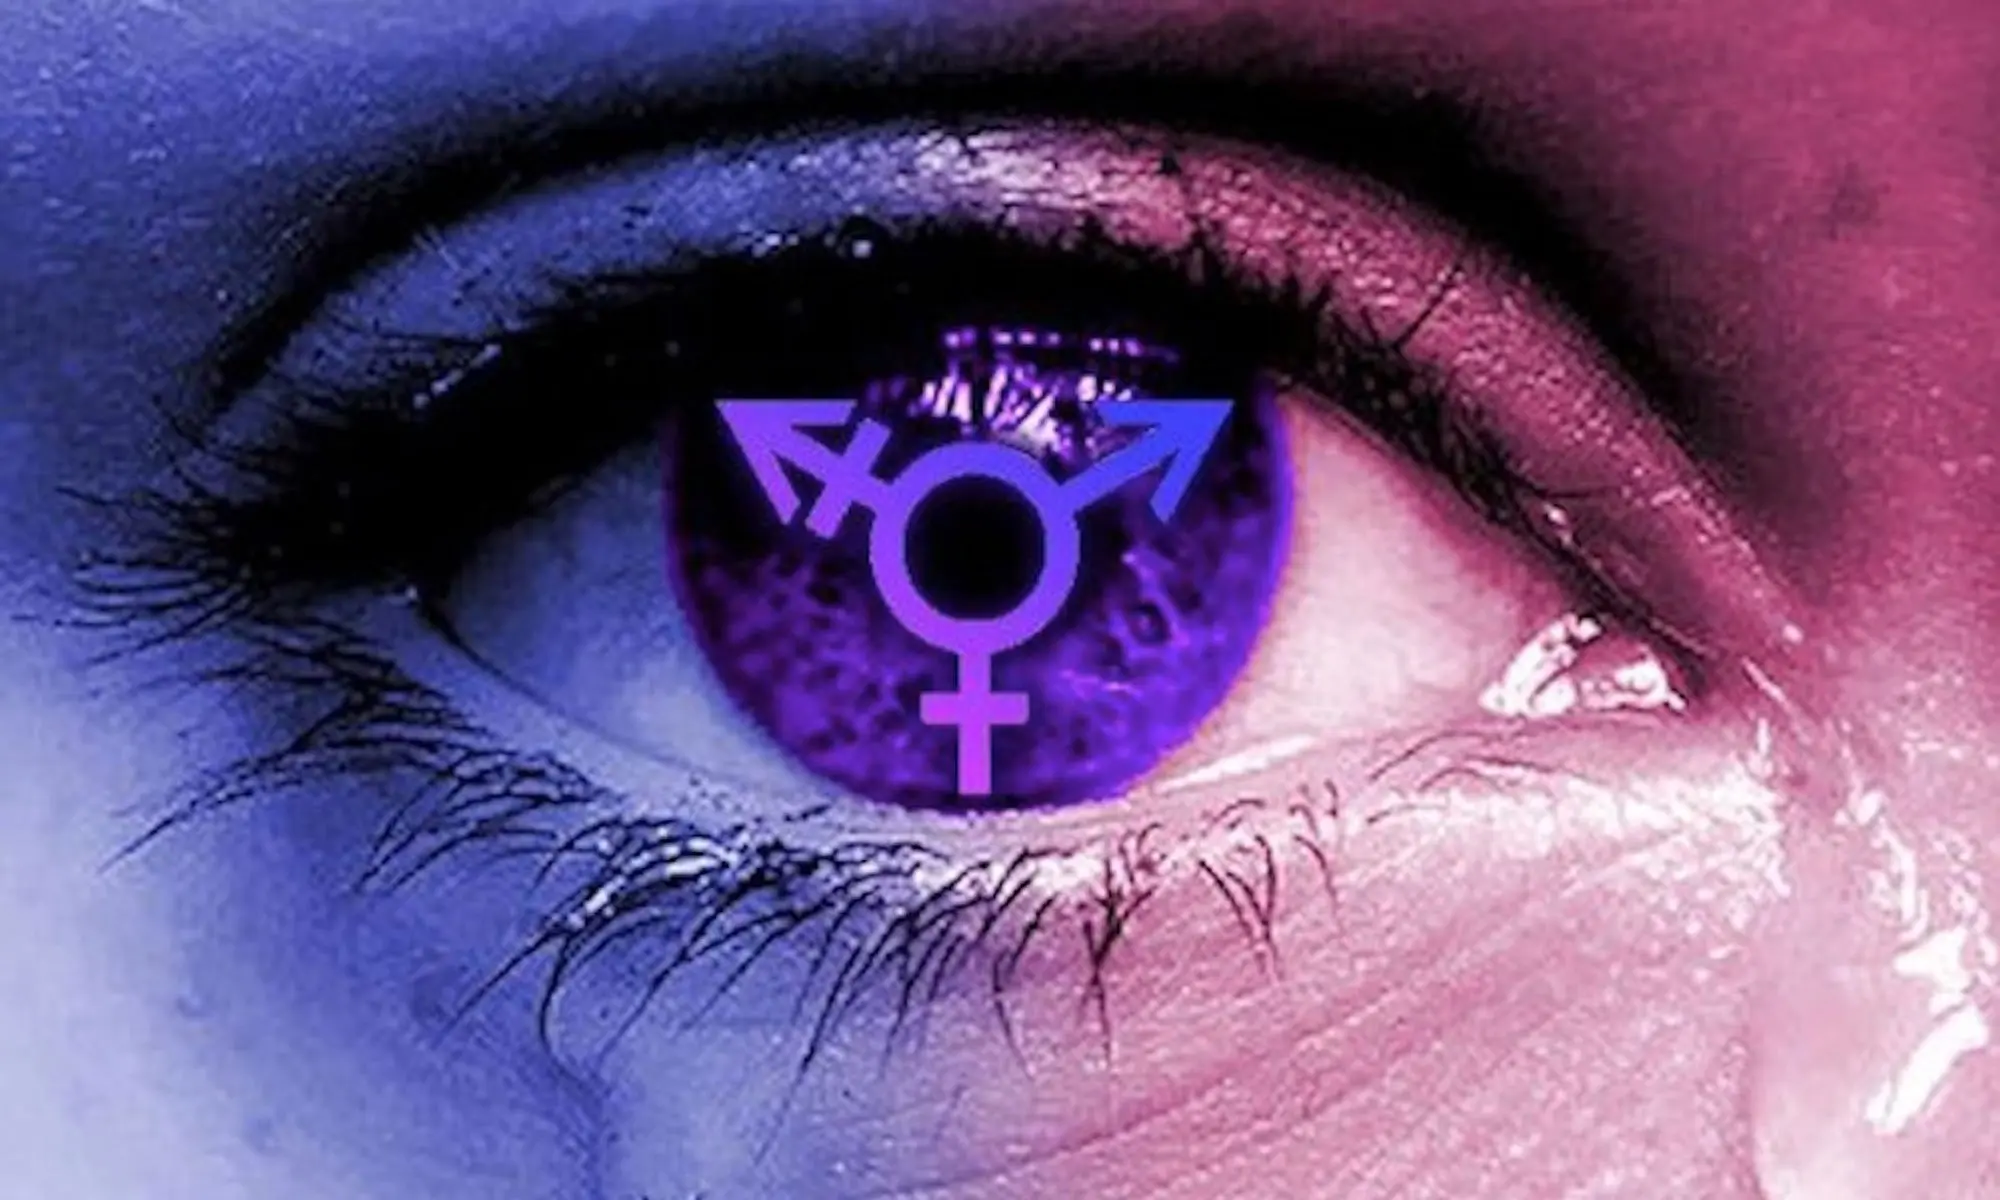

In [1]:
#libraries

import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
#unzip the file
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("Eyedataset")

In [3]:
#datagenerator for augment and provide data to GPU

train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


#valid_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory("/content/Eyedataset",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))     

#validation_generator =  valid_datagen.flow_from_directory( "gender-recognition-200k-images-celeba/Dataset/Validation/",
                                                         # batch_size  = 256,
                                                         # class_mode  = 'binary', 
                                                         # target_size = (64, 64))

Found 11525 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(), # to normalize(mean=0, std = 1) the batch between linear and non linear layers
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),

  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
 
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),



  # To Flatten layer
  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
   )

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
hist = model.fit_generator(generator=train_generator,
                    #validation_data=validation_generator,
                    #steps_per_epoch=256,
                    #validation_steps=256,
                    epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
46/46 [==============================] - 18s 388ms/step - loss: 0.6837 - accuracy: 0.5746
Epoch 2/50
46/46 [==============================] - 18s 381ms/step - loss: 0.6784 - accuracy: 0.5831
Epoch 3/50
46/46 [==============================] - 18s 380ms/step - loss: 0.6389 - accuracy: 0.6504
Epoch 4/50
46/46 [==============================] - 18s 381ms/step - loss: 0.5930 - accuracy: 0.6889
Epoch 5/50
46/46 [==============================] - 18s 381ms/step - loss: 0.5438 - accuracy: 0.7320
Epoch 6/50
46/46 [==============================] - 18s 380ms/step - loss: 0.4830 - accuracy: 0.7767
Epoch 7/50
46/46 [==============================] - 18s 383ms/step - loss: 0.5381 - accuracy: 0.7371
Epoch 8/50
46/46 [==============================] - 18s 383ms/step - loss: 0.4443 - accuracy: 0.7998
Epoch 9/50
46/46 [==============================] - 18s 382ms/step - loss: 0.4627 - accuracy: 0.7832
Epoch 10/50
46/46 [==============================] - 18s 383ms/step - loss: 0.4149 - accura

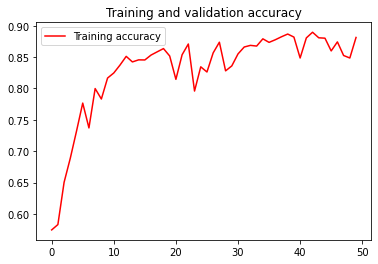

<Figure size 432x288 with 0 Axes>

In [10]:
# for plotting data
acc = hist.history['accuracy']
#val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
#val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [11]:
model.save("gender_detector_by_eye.h5") # save the model

In [12]:
import cv2 as cv
import numpy as np

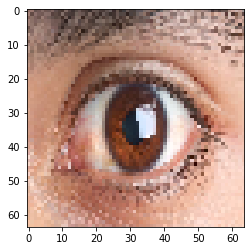

In [19]:
img = cv.imread("/content/drive/MyDrive/male_eye.jpeg")
res = cv.resize(img, dsize=(64, 64), interpolation=cv.INTER_CUBIC)
res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
plt.imshow(res)

In [17]:
res = np.expand_dims(res, axis=0) # (1, 64, 64, 3)
res.shape

(1, 64, 64, 3)

In [18]:
model.predict(res)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)